In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\sumas\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:2:0.005] #mandelbrot set

In [3]:
Y, X

(array([[-1.3  , -1.3  , -1.3  , ..., -1.3  , -1.3  , -1.3  ],
        [-1.295, -1.295, -1.295, ..., -1.295, -1.295, -1.295],
        [-1.29 , -1.29 , -1.29 , ..., -1.29 , -1.29 , -1.29 ],
        ...,
        [ 1.285,  1.285,  1.285, ...,  1.285,  1.285,  1.285],
        [ 1.29 ,  1.29 ,  1.29 , ...,  1.29 ,  1.29 ,  1.29 ],
        [ 1.295,  1.295,  1.295, ...,  1.295,  1.295,  1.295]]),
 array([[-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        ...,
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995]]))

In [8]:
Z = X+1j*Y
c = tf.constant(Z.astype("complex64"))

zs = tf.Variable(c)
ns = tf.Variable(tf.zeros_like(c, "float32"))
print(zs)

<tf.Variable 'Variable_4:0' shape=(520, 800) dtype=complex64_ref>


In [6]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

C:\Users\sumas\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [9]:
#compute new values
zs_ = zs*zs + c

In [11]:
divergence = tf.abs(zs_) < 4

In [12]:
step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(divergence, "float32")))

C:\Users\sumas\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


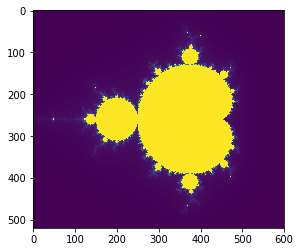

In [19]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

for i in range(200):
    step.run()
    
plt.imshow(ns.eval())
plt.show()